In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt




In [2]:
df=pd.read_csv('copy_data.csv')
df['Day']=pd.to_datetime(df['Day'])

In [3]:
df['Year']=df['Day'].dt.year
df['Month']=df['Day'].dt.month
df['Day']=df['Day'].dt.day

In [4]:
df.head()

,Day,Avg_Temperature,Avg_Humidity,Avg_Rainfall,Avg_Electric_Consumption,Year,Month,DayOfWeek
0,1,24.261809,52.687346,7.163329,405.167174,2017,1,6
1,2,23.685218,54.868454,8.508094,398.543438,2017,1,0
2,3,25.484136,47.992009,8.497075,407.468507,2017,1,1
3,4,24.337097,53.905718,8.901509,400.560122,2017,1,2
4,5,25.252514,52.093167,11.762491,396.406727,2017,1,3


In [5]:
 df.drop('DayOfWeek',axis=1,inplace=True)

In [6]:
features = ['Day', 'Month', 'Year', 'Avg_Humidity', 'Avg_Rainfall', 'Avg_Temperature']
target = 'Avg_Electric_Consumption'

X = df[features].values
y = df[target].values

# Normalize features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Reshape X for LSTM [samples, time steps, features]
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_scaled, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_reshaped.shape[1], X_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2, verbose=1)

C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.0194 - val_loss: 3.1654e-04
Epoch 2/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.0557e-04 - val_loss: 3.1337e-04
Epoch 3/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.2457e-04 - val_loss: 3.4805e-04
Epoch 4/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.1540e-04 - val_loss: 8.6504e-04
Epoch 5/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.3111e-04 - val_loss: 4.1519e-04
Epoch 6/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.6353e-04 - val_loss: 2.9493e-04
Epoch 7/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 3.8891e-04 - val_loss: 3.6274e-04
Epoch 8/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.4101e-04 - val_loss: 2.9454e-04
Epoch 9/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.1172e-04 - val_loss: 4.0988e-04
Epoch 10/10
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.0169e-04 - val_loss: 3.0821e-04


In [8]:
y_pred = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [9]:
y_pred

array([[0.47505662],
       [0.4031309 ],
       [0.54659826],
       [0.32956773],
       [0.4881423 ],
       [0.59199923],
       [0.40905264],
       [0.70514184],
       [0.49176788],
       [0.52621174],
       [0.53630555],
       [0.57140875],
       [0.57775056],
       [0.55885565],
       [0.50278497],
       [0.48927727],
       [0.5766946 ],
       [0.40671313],
       [0.4743681 ],
       [0.5466534 ],
       [0.2778234 ],
       [0.6029851 ],
       [0.79448545],
       [0.5362834 ],
       [0.5840517 ],
       [0.7267072 ],
       [0.38189462],
       [0.5228815 ],
       [0.62543887],
       [0.60408413],
       [0.5490627 ],
       [0.5294575 ],
       [0.4276364 ],
       [0.43345174],
       [0.6413996 ],
       [0.45871627],
       [0.6082141 ],
       [0.5670289 ],
       [0.5813738 ],
       [0.5446376 ],
       [0.4151836 ],
       [0.606021  ],
       [0.66570574],
       [0.77976763],
       [0.7857729 ],
       [0.42117864],
       [0.38004348],
       [0.342

In [10]:
y_test

array([0.50134761, 0.37927772, 0.52354427, 0.33457946, 0.4921964 ,
       0.60846021, 0.42174544, 0.70857678, 0.48268459, 0.55123771,
       0.54158828, 0.56390213, 0.58773526, 0.58222896, 0.5115203 ,
       0.47829566, 0.5776371 , 0.39893127, 0.49869793, 0.51137998,
       0.2780938 , 0.5593373 , 0.79651147, 0.50178494, 0.59296821,
       0.71714883, 0.4154279 , 0.50239458, 0.59858318, 0.62025531,
       0.57251303, 0.48884119, 0.4514833 , 0.43212822, 0.65267575,
       0.46477742, 0.62504563, 0.56851232, 0.57792963, 0.55665504,
       0.44138728, 0.59566663, 0.67339943, 0.76208904, 0.80788618,
       0.43918049, 0.34042512, 0.35137257, 0.66912606, 0.60935861,
       0.55086961, 0.50780951, 0.60716199, 0.59806683, 0.59731358,
       0.53029285, 0.71841996, 0.42221166, 0.39777132, 0.54254526,
       0.51287482, 0.45797085, 0.69441739, 0.61424447, 0.686331  ,
       0.51282992, 0.56043711, 0.58550301, 0.57223859, 0.4741943 ,
       0.6629356 , 0.53452189, 0.58757935, 0.65380342, 0.57159

In [11]:
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [12]:
y_pred_inv

array([[395.27667],
       [390.98953],
       [399.54092],
       [386.60483],
       [396.05664],
       [402.247  ],
       [391.3425 ],
       [408.9909 ],
       [396.27274],
       [398.32578],
       [398.9274 ],
       [401.01974],
       [401.39774],
       [400.27148],
       [396.9294 ],
       [396.1243 ],
       [401.33478],
       [391.20306],
       [395.23563],
       [399.5442 ],
       [383.5206 ],
       [402.90182],
       [414.31622],
       [398.9261 ],
       [401.77332],
       [410.27628],
       [389.72375],
       [398.12726],
       [404.24017],
       [402.96735],
       [399.6878 ],
       [398.51923],
       [392.45016],
       [392.7968 ],
       [405.19153],
       [394.3027 ],
       [403.2135 ],
       [400.75867],
       [401.61368],
       [399.42404],
       [391.70795],
       [403.0828 ],
       [406.6403 ],
       [413.43893],
       [413.7969 ],
       [392.06528],
       [389.6134 ],
       [387.36053],
       [404.97522],
       [402.35336],


In [13]:
data = pd.DataFrame({
    'Day': [1],
    'Avg_Temperature': [24.261809],
    'Avg_Humidity': [52.687346],
    'Avg_Rainfall': [7.163329],
    'Avg_Electric_Consumption': [405.167174],
    'Year': [2017],
    'Month': [1]
})

In [21]:
def predict_electric_consumption(date_str, humidity, rainfall, temp):
    # Convert date string to datetime object
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')

    # Extract day, month, and year
    day = date_obj.day
    month = date_obj.month
    year = date_obj.year

    # Create DataFrame for new input
    new_data = pd.DataFrame({
        'Day': [day],
        'Month': [month],
        'Year': [year],
        'Avg_Humidity': [humidity],
        'Avg_Rainfall': [rainfall],
        'Avg_Temperature': [temp]
    })

    # Normalize features
    scaler_X = MinMaxScaler()
    scaler_X.fit(X)  # Fit on the training data
    X_new_scaled = scaler_X.transform(new_data)

    # Reshape input for LSTM [samples, time steps, features]
    X_new_reshaped = X_new_scaled.reshape((X_new_scaled.shape[0], 1, X_new_scaled.shape[1]))

    # Predict on the new input
    y_new_pred_scaled = model.predict(X_new_reshaped)
    
    # Inverse transform the prediction
    scaler_y = MinMaxScaler()
    scaler_y.fit(y.reshape(-1, 1))  # Fit on the target data
    y_new_pred = scaler_y.inverse_transform(y_new_pred_scaled)
    
    return y_new_pred[0][0]

# Example usage


In [22]:
from datetime import datetime

# Example usage
print(predict_electric_consumption('2025-10-01', 60.0, 10.0, 25.0))

C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
401.49387


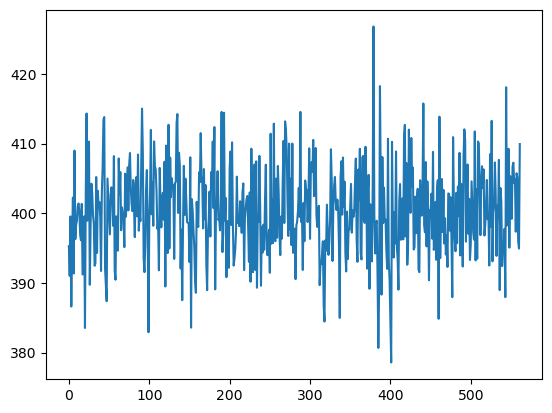

In [23]:
plt.plot((y_pred_inv))

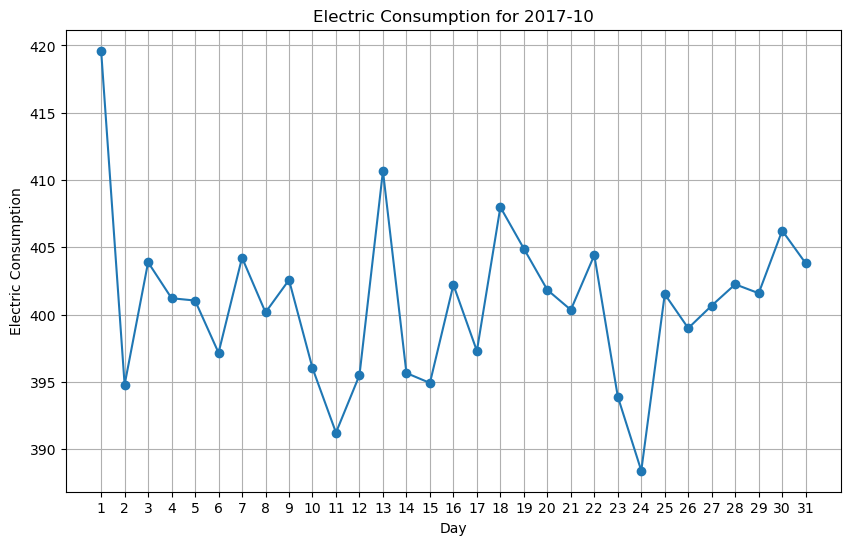

In [24]:
month_to_plot = 10
year_to_plot = 2017

filtered_data = df[(df['Month'] == month_to_plot) & (df['Year'] == year_to_plot)]

# Plot

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Day'], filtered_data['Avg_Electric_Consumption'], marker='o')
plt.title(f'Electric Consumption for {year_to_plot}-{month_to_plot:02d}')
plt.xlabel('Day')
plt.ylabel('Electric Consumption')
plt.grid(True)
plt.xticks(range(1, 32))  # Assuming days from 1 to 31
plt.show()

In [25]:

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
def predict_electric_consumption_range(start_date_str, end_date_str, humidity, rainfall, temp):
    # Convert date strings to datetime objects
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

    # Generate all dates in the range
    date_list = [start_date + timedelta(days=x) for x in range(0, (end_date - start_date).days + 1)]

    # Prepare DataFrame for new inputs
    data_list = []
    for date_obj in date_list:
        day = date_obj.day
        month = date_obj.month
        year = date_obj.year
        data_list.append([day, month, year, humidity, rainfall, temp])

    new_data = pd.DataFrame(data_list, columns=['Day', 'Month', 'Year', 'Avg_Humidity', 'Avg_Rainfall', 'Avg_Temperature'])

    # Normalize features
    scaler_X = MinMaxScaler()
    scaler_X.fit(X)  # Fit on the training data
    X_new_scaled = scaler_X.transform(new_data)

    # Reshape input for LSTM [samples, time steps, features]
    X_new_reshaped = X_new_scaled.reshape((X_new_scaled.shape[0], 1, X_new_scaled.shape[1]))

    # Predict on the new input
    y_new_pred_scaled = model.predict(X_new_reshaped)
    
    # Inverse transform the prediction
    scaler_y = MinMaxScaler()
    scaler_y.fit(y.reshape(-1, 1))  # Fit on the target data
    y_new_pred = scaler_y.inverse_transform(y_new_pred_scaled)

    # Create DataFrame for the predictions
    prediction_df = pd.DataFrame({
        'Date': date_list,
        'Predicted_Electric_Consumption': y_new_pred.flatten()
    })
    
    return prediction_df,prediction_df['Predicted_Electric_Consumption'].sum()

# Example usage
predictions ,total_power= predict_electric_consumption_range('2017-09-01', '2017-09-30', 60.0, 10.0, 25.0)
print(predictions,total_power)


C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
         Date  Predicted_Electric_Consumption
0  2017-09-01                      400.994812
1  2017-09-02                      400.972870
2  2017-09-03                      400.950531
3  2017-09-04                      400.927795
4  2017-09-05                      400.904663
5  2017-09-06                      400.881104
6  2017-09-07                      400.857178
7  2017-09-08                      400.832825
8  2017-09-09                      400.808075
9  2017-09-10                      400.782898
10 2017-09-11                      400.757324
11 2017-09-12                      400.731293
12 2017-09-13                      400.704865
13 2017-09-14                      400.678009
14 2017-09-15                      400.650726
15 2017-09-16                      400.623016
16 2017-09-17                      400.594879
17 2017-09-18                      400.566315
18 2017-09-19                      400.537292
19 2017-09-20                      400.507

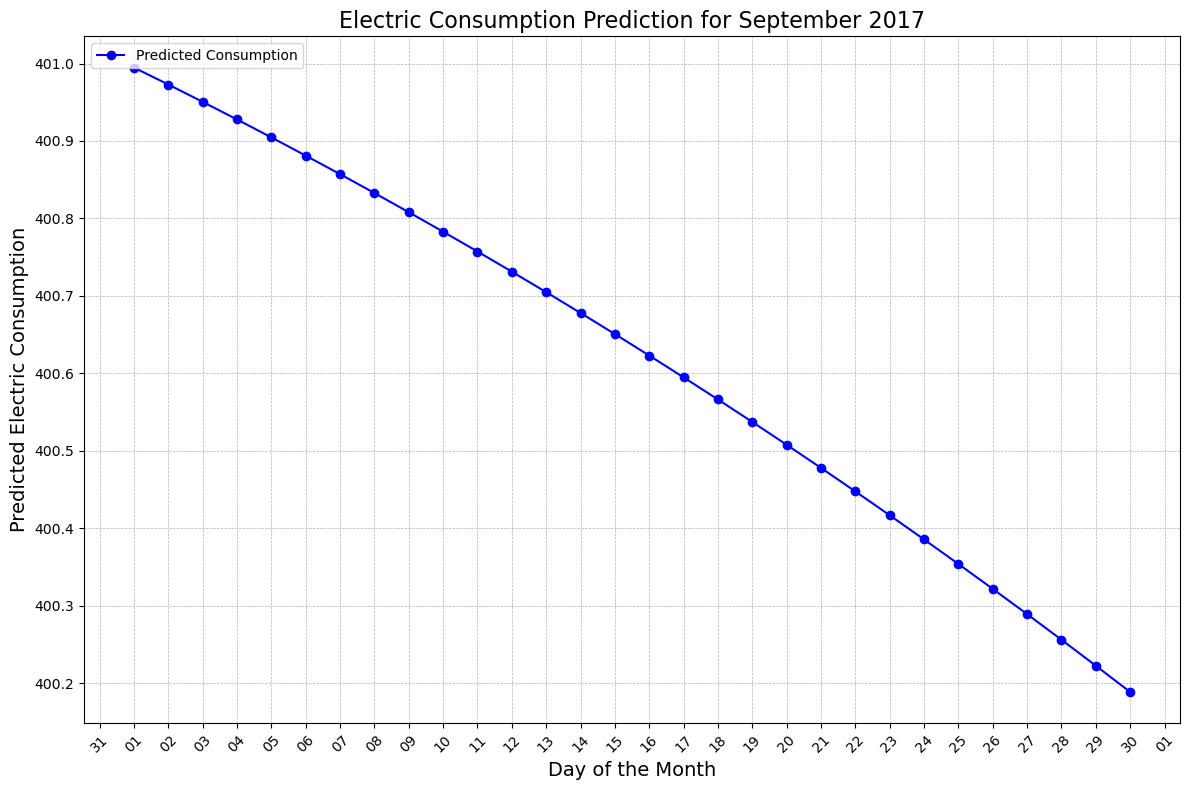

In [26]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 8))

# Plotting the data with markers and a line
plt.plot(predictions['Date'], predictions['Predicted_Electric_Consumption'], marker='o', linestyle='-', color='b')

# Format x-axis to show days of the month
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

# Customize the x-axis to show every day in the month
plt.xticks(rotation=45)  # Rotate dates for better readability

# Add titles and labels
plt.title('Electric Consumption Prediction for September 2017', fontsize=16)
plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Predicted Electric Consumption', fontsize=14)

# Add gridlines and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['Predicted Consumption'], loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [27]:
def plot_graph(predictions):
    plt.figure(figsize=(12, 8))
    # Plotting the data with markers and a line
    plt.plot(predictions['Date'], predictions['Predicted_Electric_Consumption'], marker='o', linestyle='-', color='b')

# Format x-axis to show days of the month
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))

# Customize the x-axis to show every day in the month
    plt.xticks(rotation=45)  # Rotate dates for better readability

# Add titles and labels
    plt.title('Electric Consumption Prediction for September 2017', fontsize=16)
    plt.xlabel('Day of the Month', fontsize=14)
    plt.ylabel('Predicted Electric Consumption', fontsize=14)

# Add gridlines and legend
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(['Predicted Consumption'], loc='upper left')

# Display the plot
    plt.tight_layout()
    plt.show()

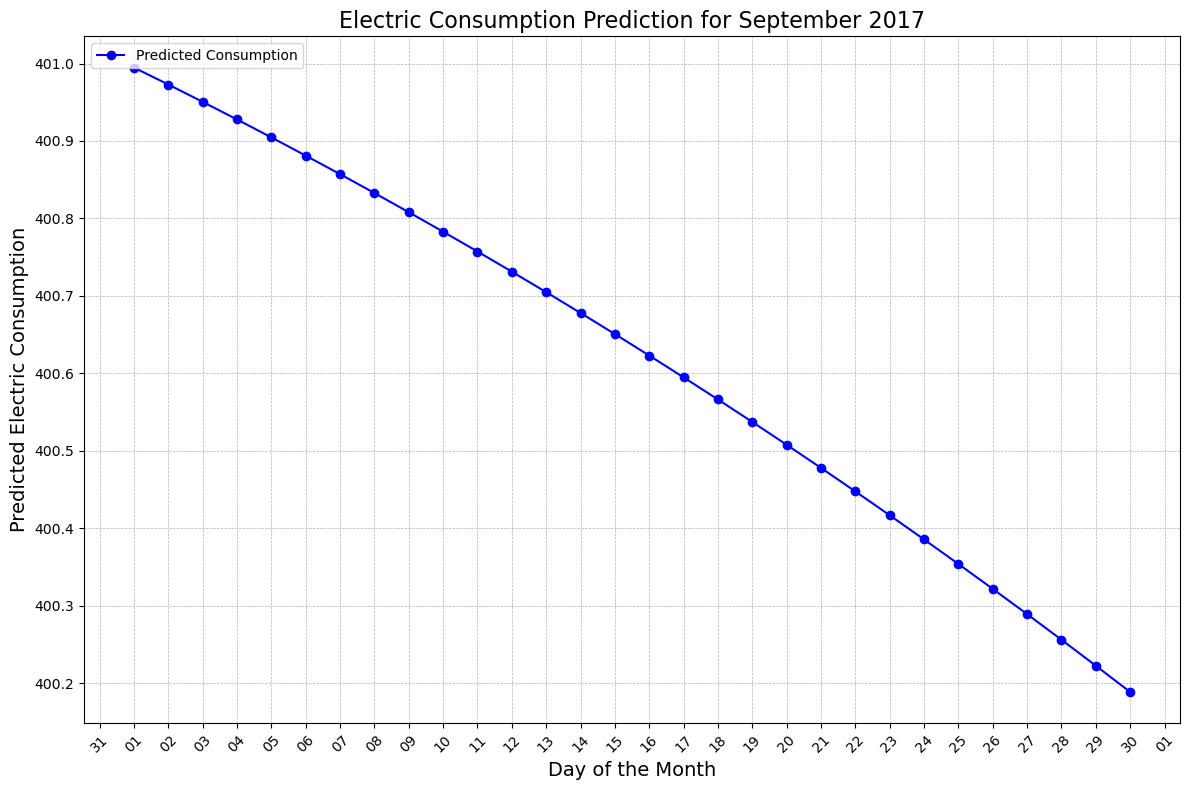

In [28]:
plot_graph(predictions)

In [31]:
oct,total_power= predict_electric_consumption_range('2024-09-01', '2024-09-30', 60.0, 10.0, 25.0)
oct

C:\Users\hetbh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


,Date,Predicted_Electric_Consumption
0,2024-09-01,401.440735
1,2024-09-02,401.420074
2,2024-09-03,401.399078
3,2024-09-04,401.377686
4,2024-09-05,401.355927
5,2024-09-06,401.333832
6,2024-09-07,401.311310
7,2024-09-08,401.288422
8,2024-09-09,401.265167
9,2024-09-10,401.241547


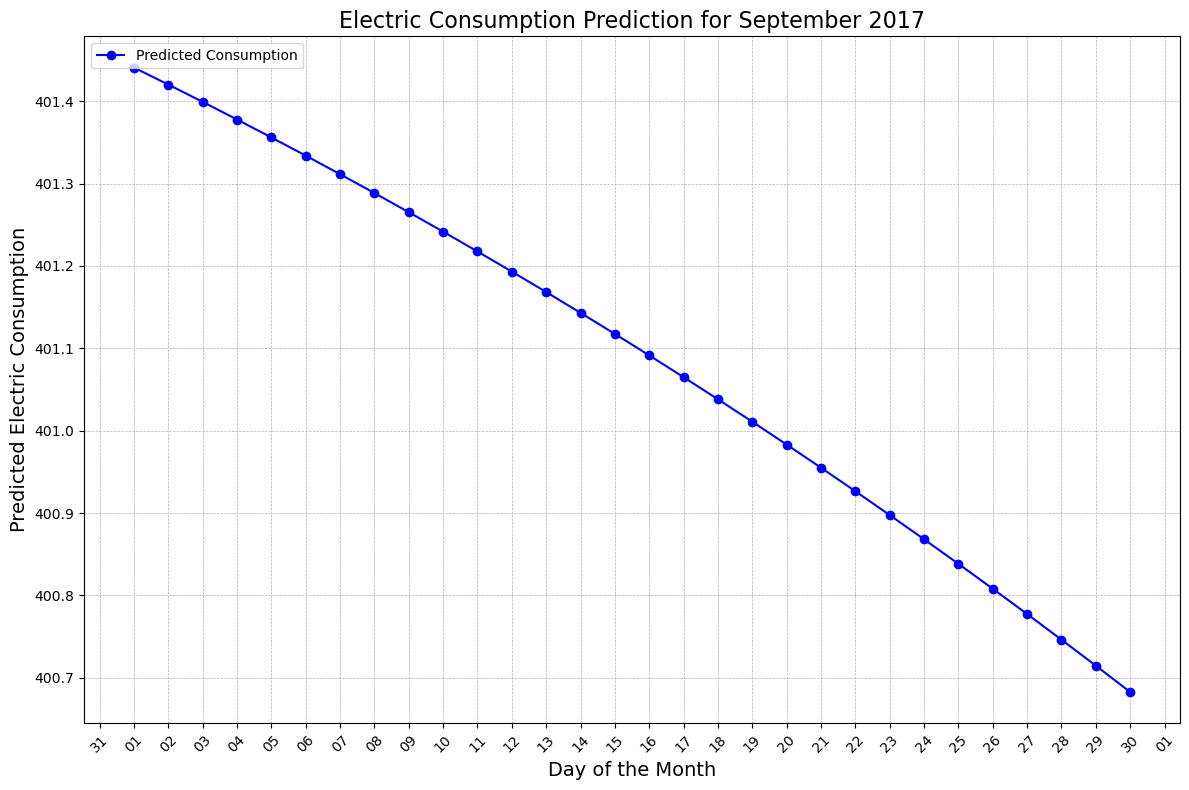

In [32]:
plot_graph(oct)

In [33]:
model.save('final_model.h5')